# **0. Dataset Description**

## **Online Shoppers Purchasing Intention Dataset Description:**

This dataset represents the sessions of different users on an e-commerce website over a one-year period.<br>
The goal is to predict whether a user will make a purchase based on various attributes related to the user's session. <br>
The dataset is especially interesting because it contains both numerical and categorical attributes, including web-page navigation details, as well as some external factors.<br>
<br>
<br>

## **Columns**
#### **1. Administrative:**<br>
*   **Type**: Numerical<br>
*   **Description**: This represents the number of pages of this type (i.e., administrative) that the user visited during the session.<br><br>

#### **2. Administrative_Duration:**<br>
*   **Type**: Numerical<br>
*   **Description**: This is the total amount of time (in seconds) the user spent on administrative pages during the session.<br><br>

#### **3. Informational:**<br>
*   **Type**: Numerical<br>
*   **Description**: This represents the number of informational pages visited by the user during the session.<br><br>

#### **4. Informational_Duration:**<br>
*   **Type**: Numerical<br>
*   **Description**: This is the total amount of time (in seconds) the user spent on informational pages during the session.<br><br>

#### **5. ProductRelated:**<br>
*   **Type**: Numerical<br>
*   **Description**: This represents the number of product-related pages visited by the user during the session.<br><br>

#### **6. ProductRelated_Duration:**<br>
*   **Type**: Numerical<br>
*   **Description**: This is the total amount of time (in seconds) the user spent on product-related pages during the session.<br><br>


#### **7. PageValues:**<br>
*   **Type**: Numerical<br>
*   **Description**: Represents the average value of the page averaged over the value of the target page or the completion of an e-commerce transaction. Higher values indicate higher intent to purchase.<br><br>

#### **8. SpecialDay:**<br>
*   **Type**: Numerical (ranging between 0 and 1)<br>
*   **Description**: This feature indicates the proximity of the time of the site visit to a special day (like Valentine's Day or Mother's Day). For instance, if the day is a special day, its value might be 1 or close to 1. If it's far from any special day, it'd be closer to 0.<br><br>

#### **9. Month:**<br>
*   **Type**: Categorical<br>
*   **Description**: Represents the month of the year during which the session occurred. For example, "Jan" for January, "Feb" for February, and so on.<br><br>


#### **10. Region:**<br>
*   **Type**: Categorical<br>
*   **Description**: Represents the geographic region from which the user accessed the website.<br><br>

#### **11. TrafficType:**<br>
*   **Type**: Categorical<br>
*   **Description**: Represents the type of traffic source by which the user came to the website. It could denote different channels like direct traffic, referrals, organic search, paid search, etc.<br><br>

#### **12. VisitorType:**<br>
*   **Type**: Categorical<br>
*   **Description**: Specifies the type of visitor. Categories include "Returning_Visitor", "New_Visitor", and possibly other types.<br><br>

#### **13. Weekend:**<br>
*   **Type**: Binary (True/False)<br>
*   **Description**: A boolean feature indicating whether the session took place on a weekend.<br><br>

#### **14. Revenue:**<br>
*   **Type**: Binary (True/False)<br>
*   **Description**:A target variable indicating whether the session concluded with a transaction (True if a purchase was made, False otherwise).<br><br>



The dataset provides insights into the behavior of website visitors and their purchasing patterns, making it a valuable resource for e-commerce businesses aiming to enhance their user experience and increase sales.<br>

You can find the dataset here:
https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset<br><br>



---



---



# **0. Print Functions**

In [12]:
import matplotlib.pyplot as plt

def print_cols(data, time_str):
    ### Print column names, BEFORE the encdoing
    columns_list = data.columns.tolist()
    print(f'Columns List {time_str} Encoding:')
    print(" ")
    for i, col in enumerate(columns_list):
        print(f'{i+1}. {col}')
    return columns_list


def print_change(before_cols, after_cols):
    # Print the dropped columns
    dropped_columns = [col for col in before_cols if col not in after_cols]
    print(f'Dropped Columns')
    print(' ')
    for i, col in enumerate(dropped_columns):
        print(f'{i+1}. {col}')
    print('-' * 40)
    print(' ')
    print(' ')
    print(' ')

    # Print the added columns
    added_columns = [col for col in after_cols if col not in before_cols]
    print(f'Added Columns')
    print(' ')
    for i, col in enumerate(added_columns):
        print(f'{i+1}. {col}')

def draw_elbow_plot(x, y):
    plt.figure(figsize=(10,6))
    plt.plot(x, y, marker='o', linestyle='--')
    plt.title('Elbow Curve')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

# **1. Loading Dataset**

In [13]:
import pandas as pd

data = pd.read_csv('/content/drive/My Drive/online_shoppers_intention.csv')

print(f'The dataset has {data.shape[0]} rows and {data.shape[1]} columns')

The dataset has 12330 rows and 15 columns


In [14]:
data.head()

,Session_ID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,PageValues,SpecialDay,Month,Region,TrafficType,VisitorType,Weekend,Revenue
0,1,0,0.0,0,0.0,1,0.000000,0.0,0.0,Feb,1,1,Returning_Visitor,False,False
1,2,0,0.0,0,0.0,2,64.000000,0.0,0.0,Feb,1,2,Returning_Visitor,False,False
2,3,0,0.0,0,0.0,1,0.000000,0.0,0.0,Feb,9,3,Returning_Visitor,False,False
3,4,0,0.0,0,0.0,2,2.666667,0.0,0.0,Feb,2,4,Returning_Visitor,False,False
4,5,0,0.0,0,0.0,10,627.500000,0.0,0.0,Feb,1,4,Returning_Visitor,True,False


# **2. Data Pre-Processing**

## 2.1 Missing Values

In [15]:
missing_values = data.isnull().sum()
missing_values

Session_ID                 0
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
PageValues                 0
SpecialDay                 0
Month                      0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

## 2.2 Preparing Columns for K-Means


### 2.2.1 Preserving the Original Data

In [16]:
# To preserve the original data, so we can perform visualization on the actual data
clustering_data = data.copy()

## 2.2.2 Continuous Variables

In [17]:
from sklearn.preprocessing import MinMaxScaler

continuous_cols = [
    "Administrative",
    "Administrative_Duration",
    "Informational",
    "Informational_Duration",
    "ProductRelated",
    "ProductRelated_Duration",
    "PageValues",
    "SpecialDay"
]


scaler = MinMaxScaler()

continuous_data = scaler.fit_transform(clustering_data[continuous_cols])

clustering_data[continuous_cols] = pd.DataFrame(continuous_data, columns=continuous_cols)

clustering_data.head(10)

,Session_ID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,PageValues,SpecialDay,Month,Region,TrafficType,VisitorType,Weekend,Revenue
0,1,0.000000,0.0,0.0,0.0,0.001418,0.000000,0.0,0.0,Feb,1,1,Returning_Visitor,False,False
1,2,0.000000,0.0,0.0,0.0,0.002837,0.001000,0.0,0.0,Feb,1,2,Returning_Visitor,False,False
2,3,0.000000,0.0,0.0,0.0,0.001418,0.000000,0.0,0.0,Feb,9,3,Returning_Visitor,False,False
3,4,0.000000,0.0,0.0,0.0,0.002837,0.000042,0.0,0.0,Feb,2,4,Returning_Visitor,False,False
4,5,0.000000,0.0,0.0,0.0,0.014184,0.009809,0.0,0.0,Feb,1,4,Returning_Visitor,True,False
5,6,0.000000,0.0,0.0,0.0,0.026950,0.002411,0.0,0.0,Feb,1,3,Returning_Visitor,False,False
6,7,0.000000,0.0,0.0,0.0,0.001418,0.000000,0.0,0.4,Feb,3,3,Returning_Visitor,False,False
7,8,0.037037,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,Feb,1,5,Returning_Visitor,True,False
8,9,0.000000,0.0,0.0,0.0,0.002837,0.000578,0.0,0.8,Feb,2,3,Returning_Visitor,False,False
9,10,0.000000,0.0,0.0,0.0,0.004255,0.011536,0.0,0.4,Feb,1,2,Returning_Visitor,False,False


### 2.2.3 Categorical Variables

In [18]:
columns_list_before = print_cols(data, 'Before')

Columns List Before Encoding:
 
1. Session_ID
2. Administrative
3. Administrative_Duration
4. Informational
5. Informational_Duration
6. ProductRelated
7. ProductRelated_Duration
8. PageValues
9. SpecialDay
10. Month
11. Region
12. TrafficType
13. VisitorType
14. Weekend
15. Revenue


In [19]:
categorical_cols = ['Month', 'VisitorType', 'Region', 'TrafficType']

clustering_data = pd.get_dummies(data, columns=categorical_cols)

In [20]:
columns_list_after = print_cols(clustering_data, 'After')

Columns List After Encoding:
 
1. Session_ID
2. Administrative
3. Administrative_Duration
4. Informational
5. Informational_Duration
6. ProductRelated
7. ProductRelated_Duration
8. PageValues
9. SpecialDay
10. Weekend
11. Revenue
12. Month_Aug
13. Month_Dec
14. Month_Feb
15. Month_Jul
16. Month_June
17. Month_Mar
18. Month_May
19. Month_Nov
20. Month_Oct
21. Month_Sep
22. VisitorType_New_Visitor
23. VisitorType_Other
24. VisitorType_Returning_Visitor
25. Region_1
26. Region_2
27. Region_3
28. Region_4
29. Region_5
30. Region_6
31. Region_7
32. Region_8
33. Region_9
34. TrafficType_1
35. TrafficType_2
36. TrafficType_3
37. TrafficType_4
38. TrafficType_5
39. TrafficType_6
40. TrafficType_7
41. TrafficType_8
42. TrafficType_9
43. TrafficType_10
44. TrafficType_11
45. TrafficType_12
46. TrafficType_13
47. TrafficType_14
48. TrafficType_15
49. TrafficType_16
50. TrafficType_17
51. TrafficType_18
52. TrafficType_19
53. TrafficType_20


In [21]:
print_change(columns_list_before, columns_list_after)

Dropped Columns
 
1. Month
2. Region
3. TrafficType
4. VisitorType
----------------------------------------
 
 
 
Added Columns
 
1. Month_Aug
2. Month_Dec
3. Month_Feb
4. Month_Jul
5. Month_June
6. Month_Mar
7. Month_May
8. Month_Nov
9. Month_Oct
10. Month_Sep
11. VisitorType_New_Visitor
12. VisitorType_Other
13. VisitorType_Returning_Visitor
14. Region_1
15. Region_2
16. Region_3
17. Region_4
18. Region_5
19. Region_6
20. Region_7
21. Region_8
22. Region_9
23. TrafficType_1
24. TrafficType_2
25. TrafficType_3
26. TrafficType_4
27. TrafficType_5
28. TrafficType_6
29. TrafficType_7
30. TrafficType_8
31. TrafficType_9
32. TrafficType_10
33. TrafficType_11
34. TrafficType_12
35. TrafficType_13
36. TrafficType_14
37. TrafficType_15
38. TrafficType_16
39. TrafficType_17
40. TrafficType_18
41. TrafficType_19
42. TrafficType_20


### 2.2.4 Boolean Variables

In [ ]:
clustering_data['Weekend'] = data['Weekend'].astype('category').cat.codes
clustering_data['Revenue'] = data['Revenue'].astype('category').cat.codes

# **3. Clustering**

### 3.1 Optimum Number of Clusters

Iteration Number: 1
Iteration Number: 2
Iteration Number: 3
Iteration Number: 4
Iteration Number: 5
Iteration Number: 6
Iteration Number: 7
Iteration Number: 8
Iteration Number: 9
Iteration Number: 10
Iteration Number: 11
Iteration Number: 12
Iteration Number: 13
Iteration Number: 14
Iteration Number: 15
Iteration Number: 16
Iteration Number: 17
Iteration Number: 18
Iteration Number: 19
Iteration Number: 20
Iteration Number: 21
Iteration Number: 22
Iteration Number: 23
Iteration Number: 24
Iteration Number: 25
Iteration Number: 26
Iteration Number: 27
Iteration Number: 28
Iteration Number: 29
Iteration Number: 30
Iteration Number: 31
Iteration Number: 32
Iteration Number: 33
Iteration Number: 34
Iteration Number: 35
Iteration Number: 36
Iteration Number: 37
Iteration Number: 38
Iteration Number: 39


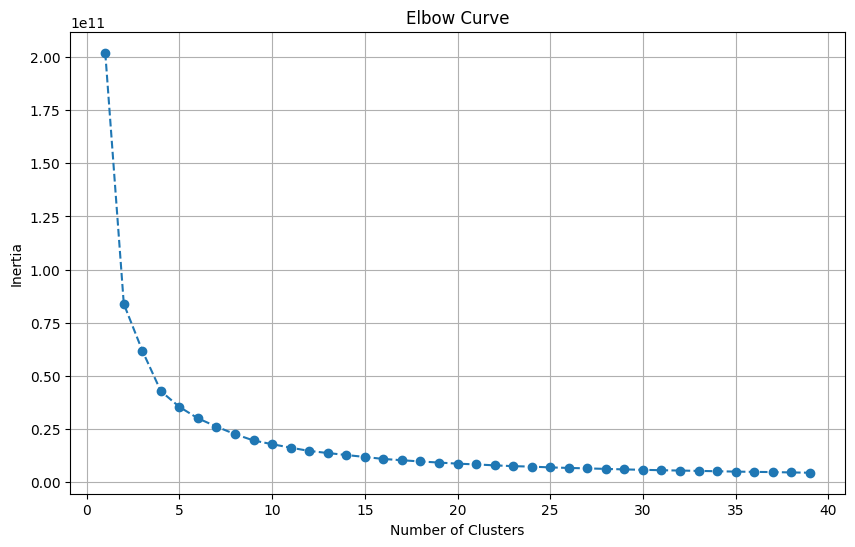

In [22]:
from sklearn.cluster import KMeans

inertia = []                  # sum of squared distances between each data point and its closest cluster centroid
cluster_range = range(1, 40)


for cluster_num in cluster_range:

    print(f'Iteration Number: {cluster_num}')

    kmeans = KMeans(n_clusters=cluster_num, n_init=10)
    kmeans.fit(clustering_data)
    inertia.append(kmeans.inertia_)


draw_elbow_plot(cluster_range, inertia)

## 3.2 Applying K-Means

In [25]:
kmeans = KMeans(n_clusters=5, n_init=20)
kmeans.fit(clustering_data)

data['Cluster'] = kmeans.labels_

data.head()

,Session_ID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,PageValues,SpecialDay,Month,Region,TrafficType,VisitorType,Weekend,Revenue,Cluster
0,1,0,0.0,0,0.0,1,0.000000,0.0,0.0,Feb,1,1,Returning_Visitor,False,False,0
1,2,0,0.0,0,0.0,2,64.000000,0.0,0.0,Feb,1,2,Returning_Visitor,False,False,0
2,3,0,0.0,0,0.0,1,0.000000,0.0,0.0,Feb,9,3,Returning_Visitor,False,False,0
3,4,0,0.0,0,0.0,2,2.666667,0.0,0.0,Feb,2,4,Returning_Visitor,False,False,0
4,5,0,0.0,0,0.0,10,627.500000,0.0,0.0,Feb,1,4,Returning_Visitor,True,False,0


# **4. Analysis and Visualiztion**

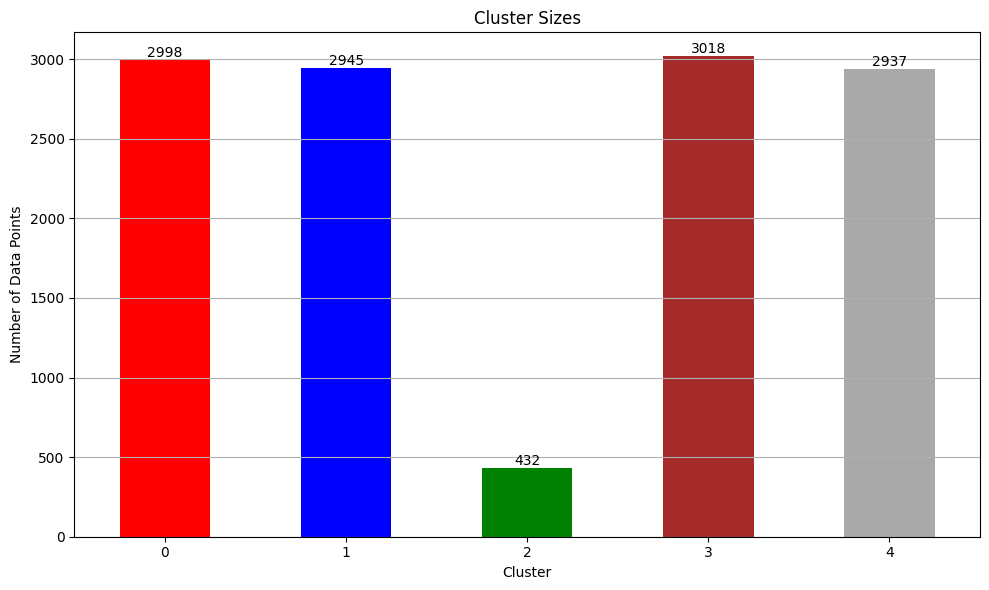

In [29]:
cluster_colors = {
    0: 'red',
    1: 'blue',
    2: 'green',
    3: 'brown',
    4: 'darkgrey'
}


cluster_sizes = data['Cluster'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
ax = cluster_sizes.plot(kind='bar', color=[cluster_colors[cluster] for cluster in cluster_sizes.index])

# Using bar_label to easily label each bar
ax.bar_label(ax.containers[0])

plt.title('Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<ipython-input-39-f0757df847de>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_profiles = data.groupby('Cluster').mean()


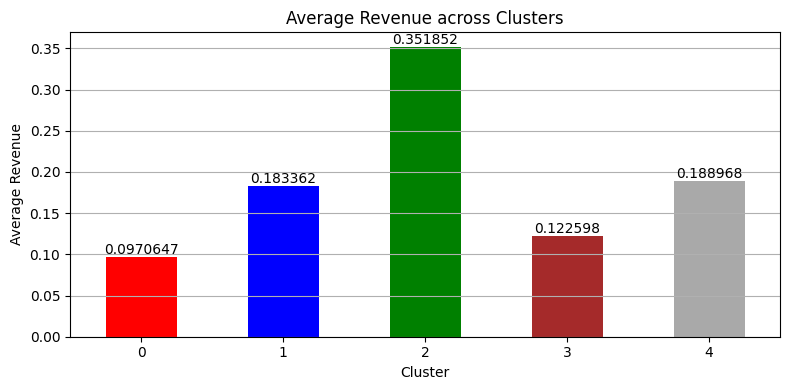

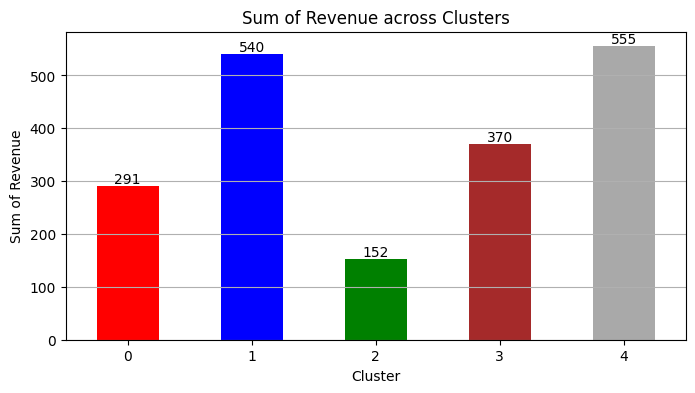

In [39]:
# Plot 1
cluster_profiles = data.groupby('Cluster').mean()

plt.figure(figsize=(8, 4))
ax = cluster_profiles['Revenue'].plot(kind='bar', color=[cluster_colors[cluster] for cluster in cluster_profiles.index])
ax.bar_label(ax.containers[0])

plt.title('Average Revenue across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Average Revenue')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()




# Plot 2
revenue_sum_per_cluster = data.groupby('Cluster')['Revenue'].sum()

plt.figure(figsize=(8, 4))
ax = revenue_sum_per_cluster.plot(kind='bar', color=[cluster_colors[cluster] for cluster in revenue_sum_per_cluster.index])
ax.bar_label(ax.containers[0])
plt.title('Sum of Revenue across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Sum of Revenue')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

<ipython-input-37-9dc01a345fcf>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_profiles = data.groupby('Cluster').mean()


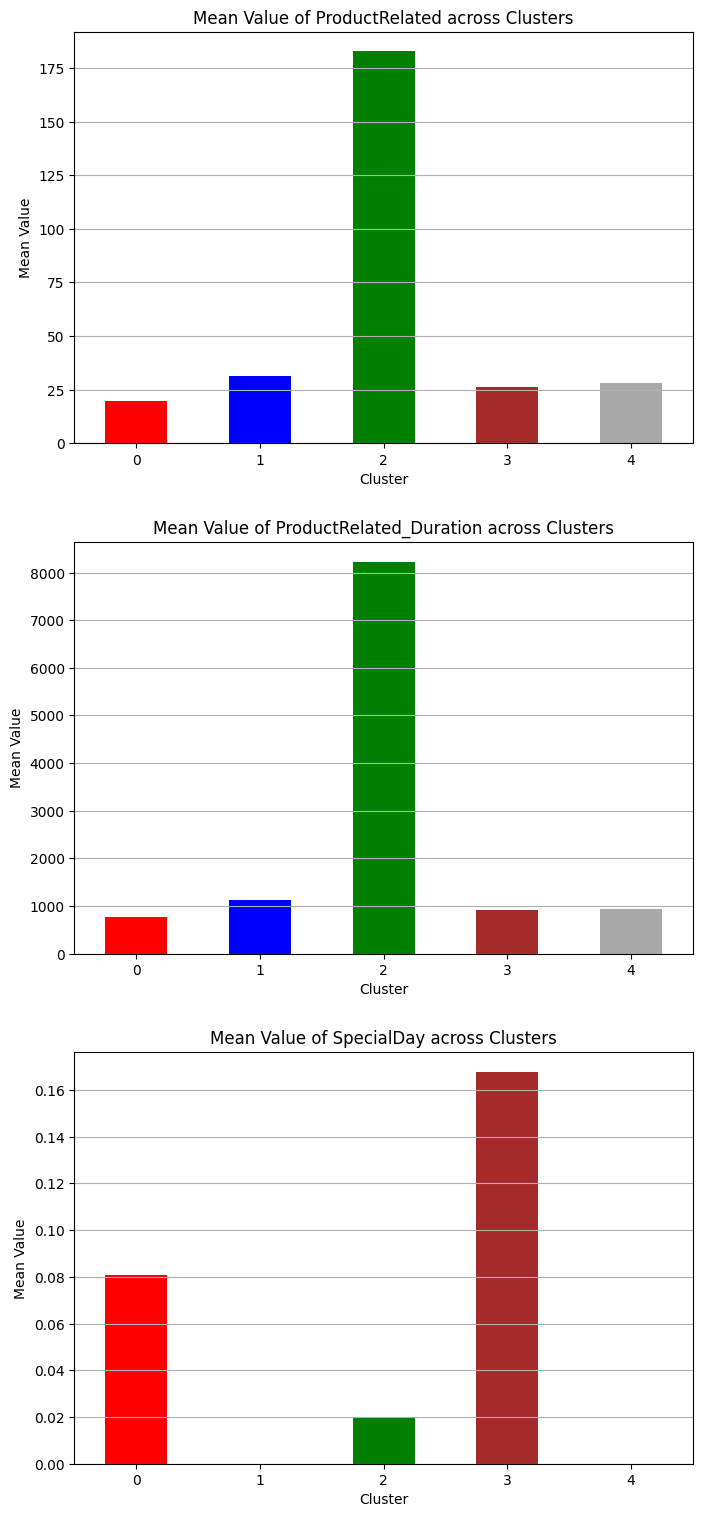

In [37]:
cluster_profiles = data.groupby('Cluster').mean()

specified_features = ['ProductRelated', 'ProductRelated_Duration', 'SpecialDay']

fig, axs = plt.subplots(len(specified_features), 1, figsize=(8, 16))
fig.tight_layout(pad=5.0)

for idx, feature in enumerate(specified_features):
    cluster_profiles[feature].plot(kind='bar', ax=axs[idx], color=[cluster_colors[cluster] for cluster in cluster_profiles.index])
    axs[idx].set_title(f'Mean Value of {feature} across Clusters')
    axs[idx].set_ylabel('Mean Value')
    axs[idx].set_xlabel('Cluster')
    axs[idx].grid(axis='y')
    axs[idx].set_xticklabels(axs[idx].get_xticklabels(), rotation=0)

plt.show()

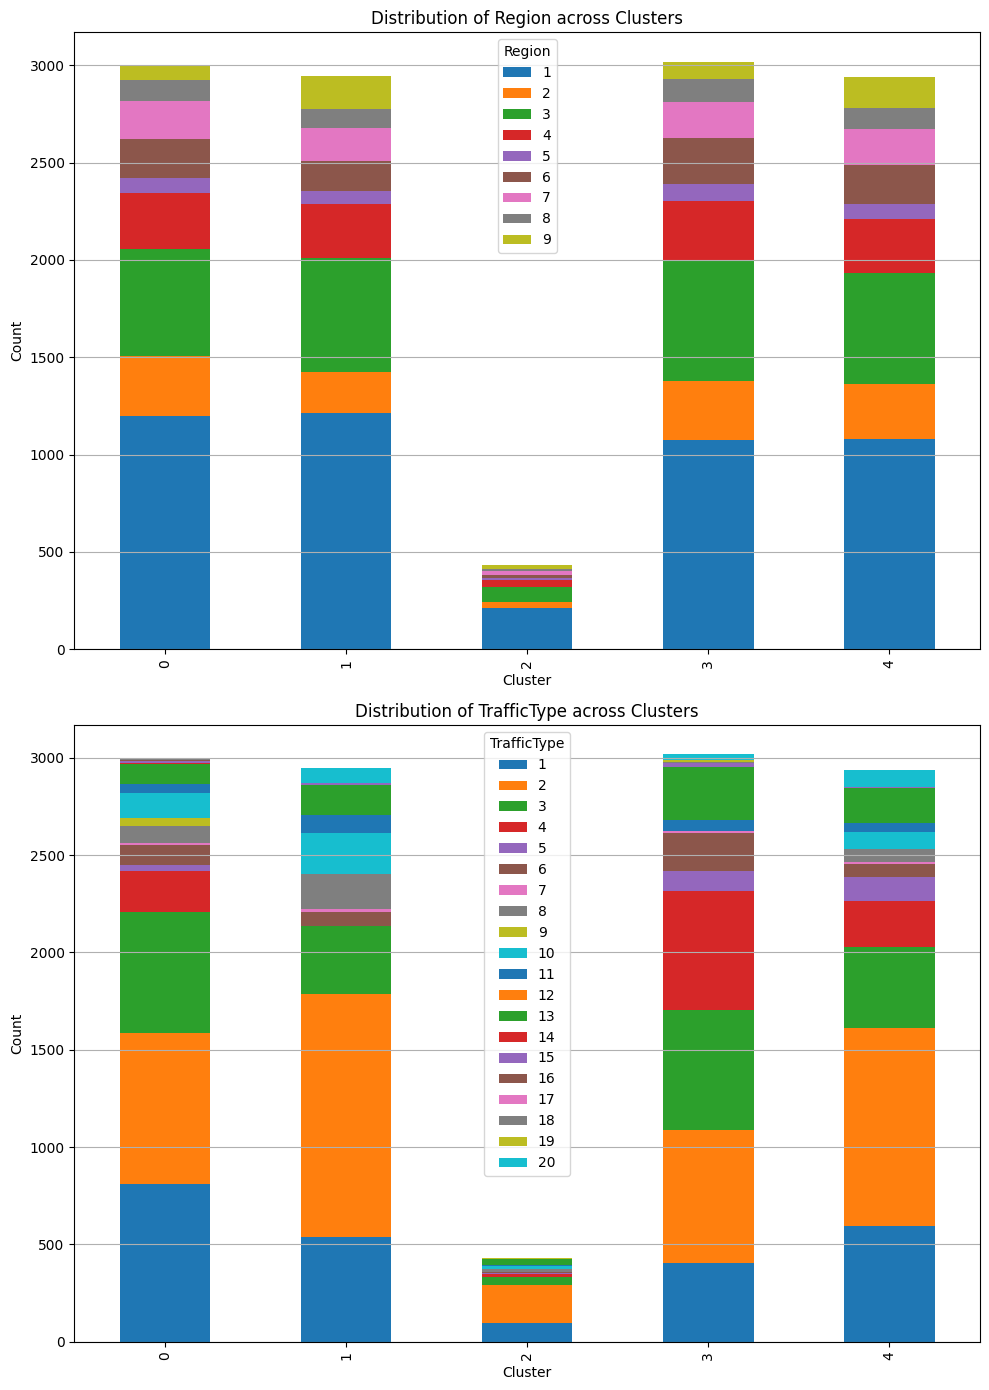

In [38]:
# Please make sure to scroll down to see all the plots

features_to_visualize = ['Region', 'TrafficType']

plt.figure(figsize=(10, 7 * len(features_to_visualize)))

for idx, feature in enumerate(features_to_visualize):
    plt.subplot(len(features_to_visualize), 1, idx+1)

    feature_counts = data.groupby(['Cluster', feature]).size().unstack().fillna(0)

    feature_counts.plot(kind='bar', stacked=True, ax=plt.gca())

    plt.title(f'Distribution of {feature} across Clusters')
    plt.xlabel('Cluster')
    plt.ylabel('Count')
    plt.legend(title=feature)
    plt.grid(axis='y')

plt.tight_layout()
plt.show()